In [1]:
# iris data
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
X = iris.drop('species', axis=1)
y = iris['species']

In [3]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
# Classification Tree
from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [6]:
# Training Accuracy
y_train_pred = dtc.predict(X_train)

# Test Accuracy
y_test_pred = dtc.predict(X_test)

In [7]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))

0.9523809523809523


In [8]:
print(metrics.accuracy_score(y_test, y_test_pred))

0.9777777777777777


In [9]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [17]:
tree.plot_tree(dtc.fit(X_train, y_train))

[Text(165.33333333333334, 323.4, 'X[3] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(82.66666666666667, 230.99999999999997, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(248.0, 230.99999999999997, 'X[2] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(165.33333333333334, 138.6, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(330.6666666666667, 138.6, 'X[3] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(248.0, 46.19999999999999, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(413.33333333333337, 46.19999999999999, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

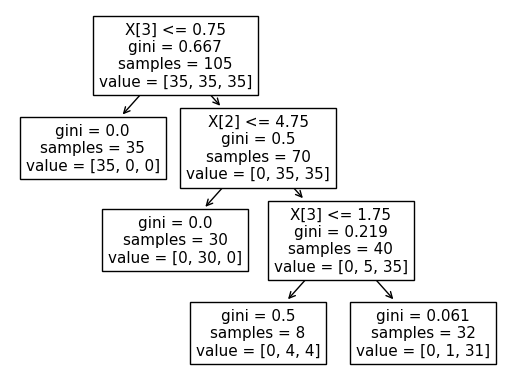

In [18]:
import matplotlib.pyplot as plt
tree.plot_tree(dtc.fit(X_train, y_train))
plt.show()

In [19]:
# Graph
!pip install pydotplus

In [20]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtc,
                          filled = True,
                          rounded = True,
                          class_names = ['Setosa', 'Versicolor', 'Virginica'],
                          feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'],
                          out_file=None)

graph = graph_from_dot_data(dot_data)

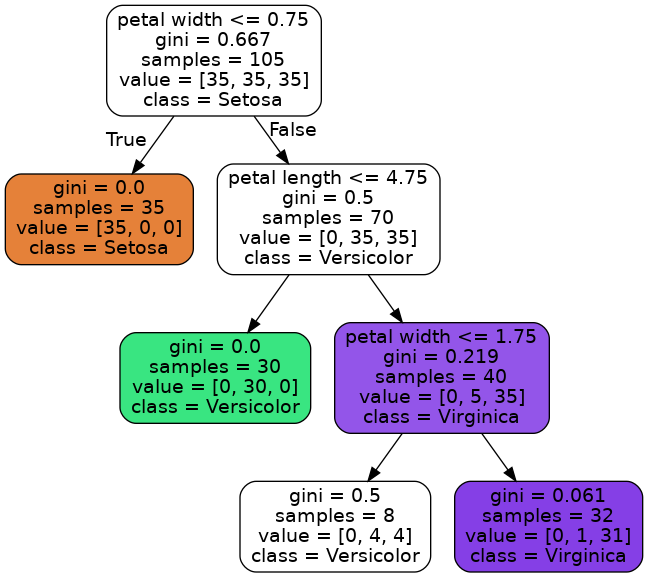

In [21]:
from IPython.display import Image

# Console 창에 그림 출력
Image(graph.create_png())